# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

In [9]:
import numpy as np
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv', index_col=[0]).reset_index(drop=True)
def clean(df):
    columns = []
    for name in df.columns:
        name = name.lower().replace(" ", "_")
        columns.append(name)
    df.columns = columns
    return df
df = clean(df)
display(df.shape)
df.head()

(10910, 25)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [10]:
df1 = df.query("total_claim_amount > 1000 & response == 'Yes'")
display(df1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,NaN
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,16181,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10351,FN44127,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,20978,...,1.0,1,Personal Auto,Personal L2,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10373,XZ64172,Oregon,10963.957230,Yes,Premium,High School or Below,2/8/11,Employed,M,55687,...,0.0,1,Corporate Auto,Corporate L2,Offer1,Agent,1324.800000,Luxury SUV,Medsize,NaN
10487,IX60941,Oregon,3508.569533,Yes,Extended,College,1/5/11,Medical Leave,M,20978,...,1.0,1,Personal Auto,Personal L3,Offer2,Branch,1176.278800,Four-Door Car,Small,NaN
10565,QO62792,Oregon,7840.165778,Yes,Extended,College,1/14/11,Employed,M,58414,...,2.0,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,NaN,NaN,NaN


In [11]:
df1.value_counts('response')

response
Yes    67
dtype: int64

2. Using the original dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [18]:
import numpy as np
# df2=df[df['response'] == 'Yes'].groupby(["policy_type", "gender"])[["total_claim_amount"]].mean().round(2)
df2 = round(df[df['response'] == 'Yes'].pivot_table(index=['policy_type', 'gender'], aggfunc={"total_claim_amount": 'mean'}), 2)
df2 = df2.sort_values(by=['total_claim_amount'], ascending=False)
display(df2)
# Conclusion
# Personal auto claim amounts are larger than corporate auto
# Average female claims are generally higher than male claims across policy types
# Average claim amounts across policies are close to each other

,,total_claim_amount
policy_type,gender,
Personal Auto,M,457.01
Special Auto,F,453.28
Personal Auto,F,452.97
Corporate Auto,F,433.74
Special Auto,M,429.53
Corporate Auto,M,408.58


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [26]:
df3 = df.query('number_of_policies > 0')
df3 = df3.pivot_table(index=["state"], aggfunc={"customer": 'count'})
df3 = df3.query('customer > 500')
display(df3)

,customer
state,
Arizona,1937
California,3552
Nevada,993
Oregon,2909
Washington,888


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [27]:
df4 = df.pivot_table(index=['education', 'gender'], aggfunc={"customer_lifetime_value": ['max', 'min', 'mean']}).round(2)
display(df4)

customer_lifetime_value                  
                                                max     mean      min
education            gender                                          
Bachelor             F                     73225.96  7874.27  1904.00
                     M                     67907.27  7703.60  1898.01
College              F                     61850.19  7748.82  1898.68
                     M                     61134.68  8052.46  1918.12
Doctor               F                     44856.11  7328.51  2395.57
                     M                     32677.34  7415.33  2267.60
High School or Below F                     55277.45  8675.22  2144.92
                     M                     83325.38  8149.69  1940.98
Master               F                     51016.07  8157.05  2417.78
                     M                     50568.26  8168.83  2272.31

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [15]:
# your code goes here

_______________

# lab-customer-analysis-round-3_final

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

1. Show DataFrame info.

2. Describe DataFrame.

In [30]:
display(df)
display(df.shape)
display(df.describe())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


(10910, 25)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


3.- Show a plot of the total number of responses

In [32]:
df.value_counts('response')

response
No     8813
Yes    1466
dtype: int64

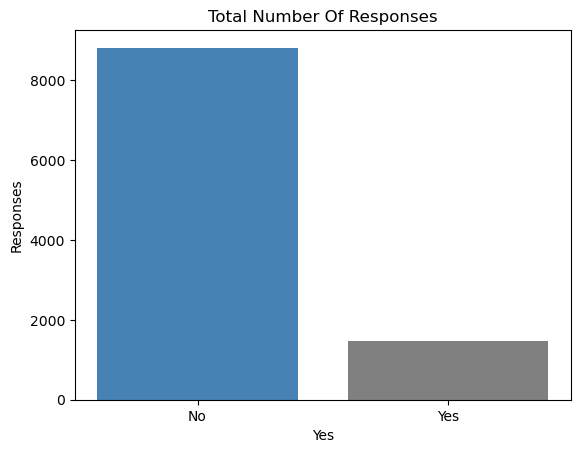

In [35]:
fig, ax = plt.subplots()
ax.bar(x = df['response'].value_counts().index, height = df['response'].value_counts().values, color = ['steelblue', 'grey'])
ax.set_xlabel("Yes")
ax.set_ylabel("Responses")
ax.set_title("Total Number Of Responses")
plt.show()

4.- Show a plot of the response rate by the sales channel.

In [23]:
df.value_counts("sales_Channel")

Sales Channel
Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: count, dtype: int64

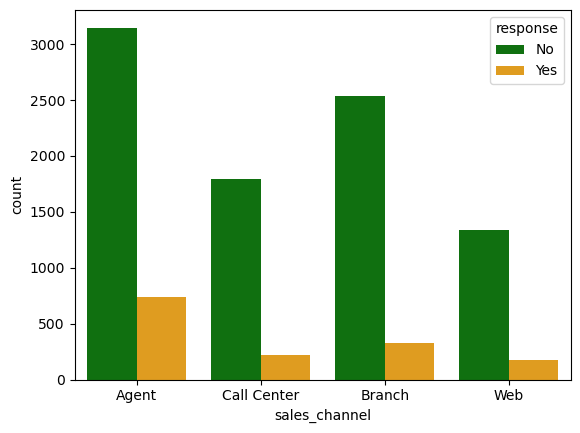

In [38]:
fig, ax = plt.subplots()
sns.countplot(data=df, x="sales_channel",  palette=['green', 'orange'], hue="response")
plt.show()

5.- Show a plot of the response rate by the total claim amount.

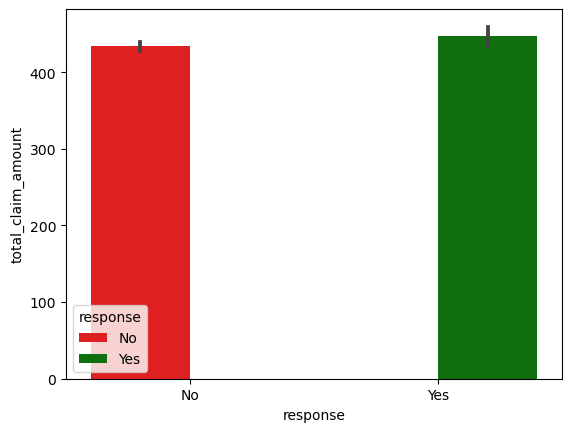

In [39]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='response', y='total_claim_amount', palette=['red', 'green'], ax = ax, hue='response')
plt.show()

6.- Show a plot of the response rate by income.

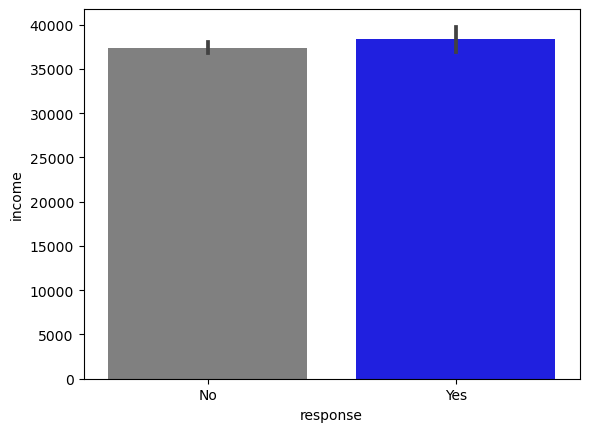

In [40]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='response', y='income', palette=['grey', 'blue'], ax = ax)
plt.show()